In [1]:
import urllib
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import openapi

In [2]:
import requests

s_key = "l53cN3mbhsudCVoI7zttwvpHkgCTM8on0LpEaT2FZT1/6+weHhppLkhYpjiYtdPL3/h7rqYRcFNBJQCklXUZUQ=="
url = 'http://apis.data.go.kr/B551172/Gastric05/gsSmokeByType'

params = {
    'serviceKey': s_key,
    'type': 'json',
    'numOfRows': 100,   # 한 페이지당 최대 100개 가져오기
    'centerNm': '국립암센터',
    'fromYear': '2010',
    'toYear': '2023',
    'pageNo': 1         # 첫 번째 페이지부터 시작
}

all_data = []  # 전체 데이터를 저장할 리스트

# 1. 먼저 첫 번째 요청을 보내서 totalCount 확인
response = requests.get(url, params=params)
if response.status_code == 200:
    desk_dict = response.json()
    total_count = desk_dict.get('totalCount', 0)  # 전체 데이터 개수
    items_per_page = params['numOfRows']         # 한 페이지당 데이터 개수
    total_pages = (total_count // items_per_page) + (1 if total_count % items_per_page else 0)  # 총 페이지 수

    print(f"📌 총 데이터 개수: {total_count}, 가져올 페이지 수: {total_pages}")

    # 2. total_pages 수만큼 반복하여 모든 데이터를 가져오기
    for i in range(1, total_pages + 1):
        params['pageNo'] = i  
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            desk_dict = response.json() 
            items = desk_dict.get('items', [])  # 데이터가 없을 경우 빈 리스트 반환
            all_data.extend(items)
        else:
            print(f"❌ 데이터 요청 실패 (페이지 {i})")

    print(f"✅ 총 {len(all_data)}개의 데이터 수집 완료!")
else:
    print("❌ API 요청 실패")

📌 총 데이터 개수: 1120, 가져올 페이지 수: 12
✅ 총 1120개의 데이터 수집 완료!


In [3]:
# import urllib.parse
# import requests

# s_key = ("l53cN3mbhsudCVoI7zttwvpHkgCTM8on0LpEaT2FZT1/6+weHhppLkhYpjiYtdPL3/h7rqYRcFNBJQCklXUZUQ==")
# url = 'http://apis.data.go.kr/B551172/Gastric05/gsSmokeByType'

# params = {
#     'serviceKey': s_key,
#     'type': 'json',
#     'numOfRows': 100,
#     'centerNm': '국립암센터',
#     'fromYear': '2010',
#     'toYear': '2023'
# }

# all_data = []

# for i in range(1, 11):
#     params['pageNo'] = i  
#     response = requests.get(url, params=params)
    
#     if response.status_code == 200:
#         desk_dict = response.json() 
#         if 'items' in desk_dict and desk_dict['items']:
#             all_data.extend(desk_dict['items'])
#     else:
#         print("error")

In [4]:
df_smoking = pd.DataFrame(all_data)
df_smoking

,statsMetaNo,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ncsNmvl,wholNcsDnmvl,ptCntNmvl,wholPtCntDnmvl
0,17050,국립암센터,2021,74,M,N,3,3,3,3
1,17050,국립암센터,2016,64,M,N,4,4,4,4
2,17050,국립암센터,2019,40,F,N,2,2,2,2
3,17050,국립암센터,2013,75,F,N,4,4,4,4
4,17050,국립암센터,2012,50,M,Y,4,5,4,5
...,...,...,...,...,...,...,...,...,...,...
1115,17050,국립암센터,2010,78,F,무응답,1,1,1,1
1116,17050,국립암센터,2011,31,M,무응답,2,2,2,2
1117,17050,국립암센터,2013,41,F,N,1,1,1,1
1118,17050,국립암센터,2019,49,M,N,1,1,1,1


In [5]:
df_smoking = df_smoking.iloc[:, [1,2,3,4,5,-2]]

In [6]:
df_smoking.rename(columns={'statsTrgtNm': '현재 흡연 여부', 'ptCntNmvl': '환자수'}, inplace=True)

C:\Users\human\AppData\Local\Temp\ipykernel_15520\2024029018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoking.rename(columns={'statsTrgtNm': '현재 흡연 여부', 'ptCntNmvl': '환자수'}, inplace=True)


In [7]:
df_smoking.rename(columns={'centerNm':'센터 이름', 'critYr':'기준 년도', 'ptAge':'연령' ,'ptSexCd':'성별'}, inplace=True)
df_smoking

C:\Users\human\AppData\Local\Temp\ipykernel_15520\1956949848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoking.rename(columns={'centerNm':'센터 이름', 'critYr':'기준 년도', 'ptAge':'연령' ,'ptSexCd':'성별'}, inplace=True)


,센터 이름,기준 년도,연령,성별,현재 흡연 여부,환자수
0,국립암센터,2021,74,M,N,3
1,국립암센터,2016,64,M,N,4
2,국립암센터,2019,40,F,N,2
3,국립암센터,2013,75,F,N,4
4,국립암센터,2012,50,M,Y,4
...,...,...,...,...,...,...
1115,국립암센터,2010,78,F,무응답,1
1116,국립암센터,2011,31,M,무응답,2
1117,국립암센터,2013,41,F,N,1
1118,국립암센터,2019,49,M,N,1


In [8]:
df_smoking['환자수'] = pd.to_numeric(df_smoking['환자수'], errors='coerce')

df_smoking['환자수'] = df_smoking['환자수'].fillna(0).astype(int)

smoking_count = df_smoking.groupby(df_smoking['현재 흡연 여부'].fillna('무응답'))['환자수'].sum()

print(smoking_count)

현재 흡연 여부
N      1699
Y       226
무응답     825
Name: 환자수, dtype: int64


C:\Users\human\AppData\Local\Temp\ipykernel_15520\1139263450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoking['환자수'] = pd.to_numeric(df_smoking['환자수'], errors='coerce')
C:\Users\human\AppData\Local\Temp\ipykernel_15520\1139263450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoking['환자수'] = df_smoking['환자수'].fillna(0).astype(int)


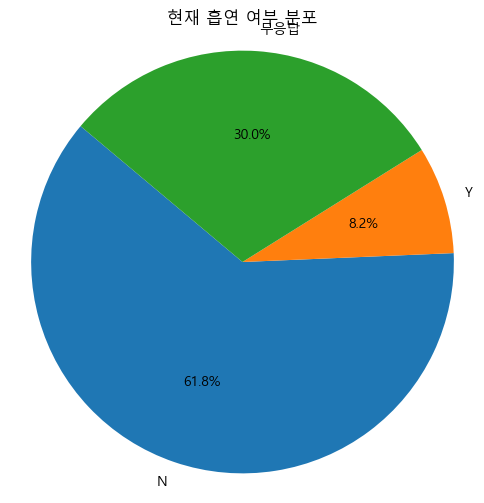

In [9]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(smoking_count.values, labels=smoking_count.index, autopct='%1.1f%%', startangle=140)
plt.title('현재 흡연 여부 분포')
plt.axis('equal')
plt.show()